# Reading Data

In [1]:
import time

import numpy as np

import os

import scipy.io as scio
from matplotlib import pyplot as plt 

readflag=1

# Reading data

if readflag:
    path_int='../数据/'
    num_of_gestures=5
    path_k=[0]*num_of_gestures
    path_k[0]='大拇指向上/'
    path_k[1]='大拇指向下/'
    path_k[2]='停止/'
    path_k[3]='向右/'
    path_k[4]='向左/'
    path_d=[0,0,0]
    path_d[0]='/acc_raw.mat'
    path_d[1]='/EMGs_raw.mat'
    path_d[2]='/gyro_raw.mat'
    
    
    data_all=[]
    
    for ki in range(len(path_k)):
        path=path_int+path_k[ki]
        files= os.listdir(path) # get all the files in the path
        data_kall=[]
        for file in files: # read all files in the path
            if  os.path.isdir(path+file): # determine if it is a file
                # print(path+file)
                data_d=[]
                for di in range(len(path_d)):
                    # np.load(path+file+path_d0)
                    p0=path+file+path_d[di]
                    data = scio.loadmat(p0)
                    if di==0:
                        data_np=data['accel_data']
                    if di==1:
                        data_np=data['emg_data']
                    if di==2:
                        data_np=data['gryo_data']
                    data_d.append(data_np)
                    # print(p0)
            data_kall.append(data_d)
        data_all.append(data_kall)

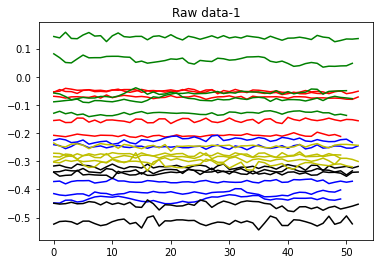

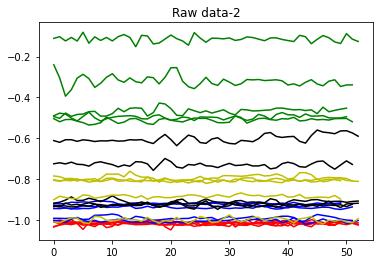

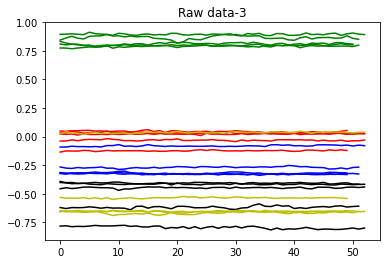

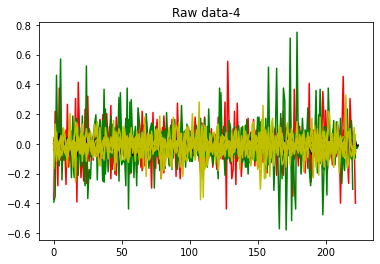

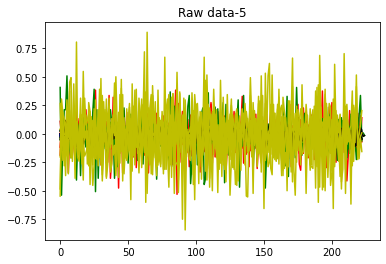

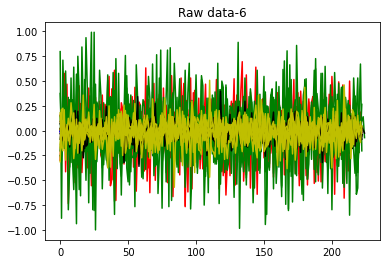

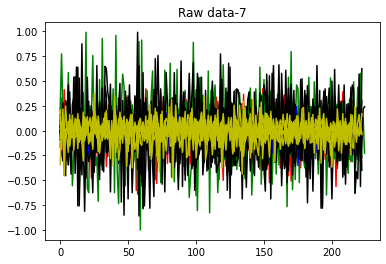

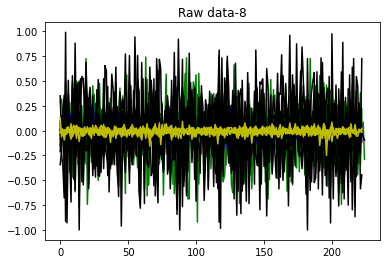

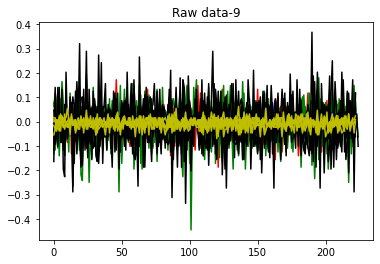

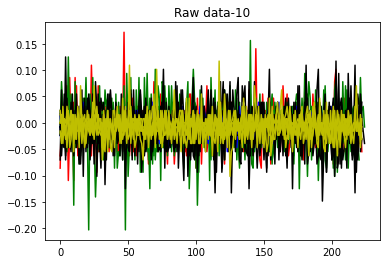

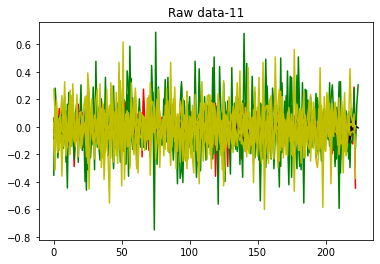

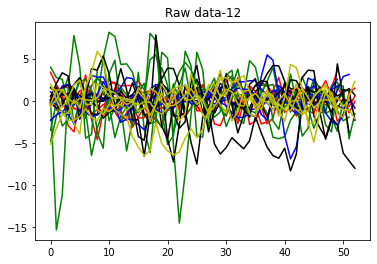

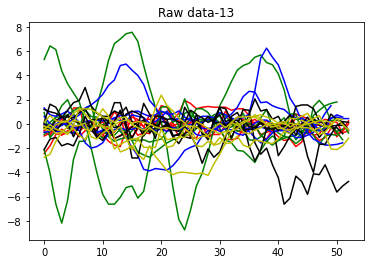

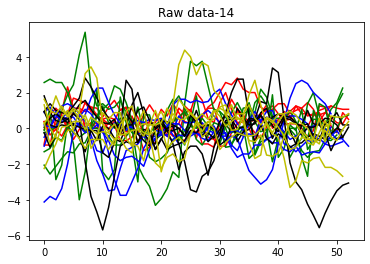

In [2]:
#plot the signal
allcolor=["r","g","b","k","y"]
if 1:
    kmax=4
    # dmax=
    for ki in range(5):
        # num of files in data
        numimax=len(data_all[ki])
        numimax=5
        for numi in range(numimax):
            fi=0
            for di in range(3):
                pxy=data_all[ki][numi][di]
                for ni in range(pxy.shape[1]):
                    fi=fi+1
                    f1=plt.figure(fi)
                    plt.plot(pxy.T[ni,:],color=allcolor[ki])
                    plt.title("Raw data-"+str(fi))
    plt.show()

# Signal Preprocessing

0


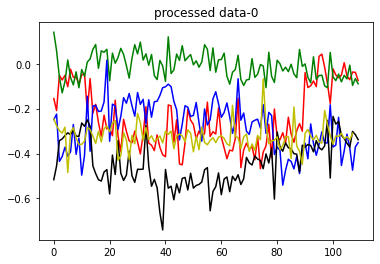

1


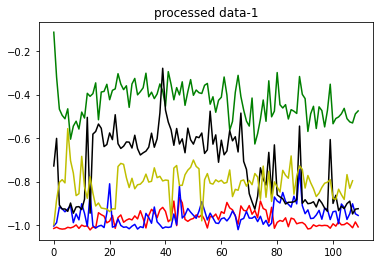

2


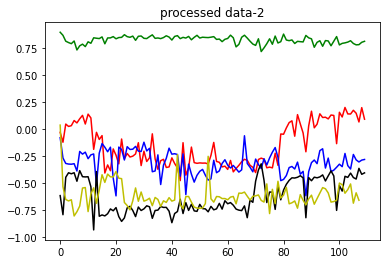

3


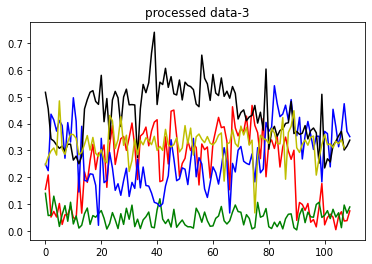

4


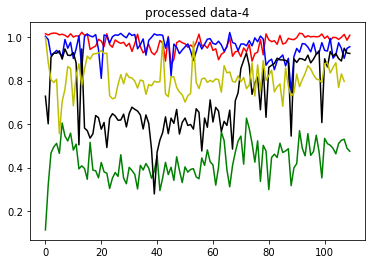

5


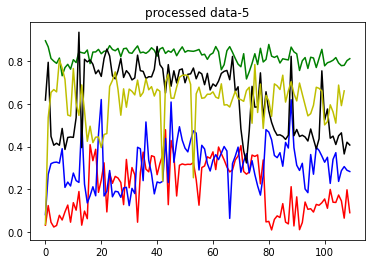

6


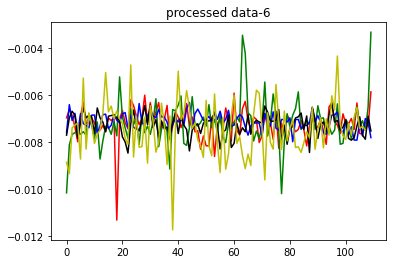

7


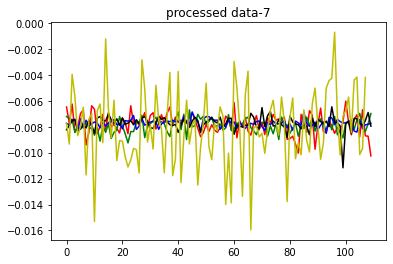

8


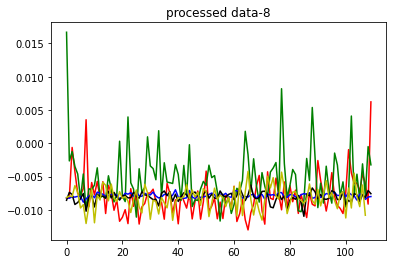

9


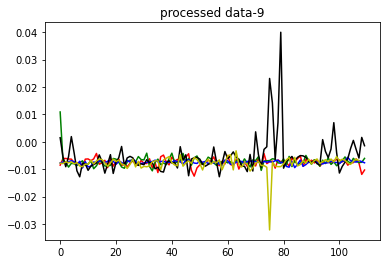

10


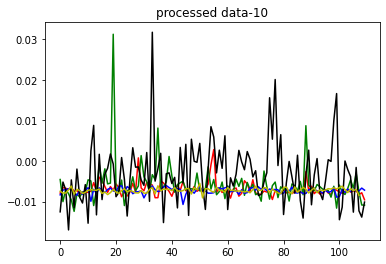

11


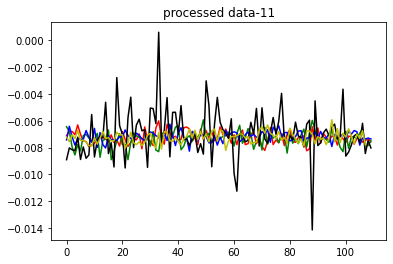

12


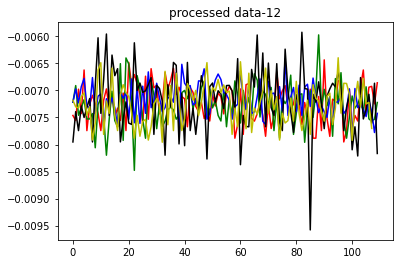

13


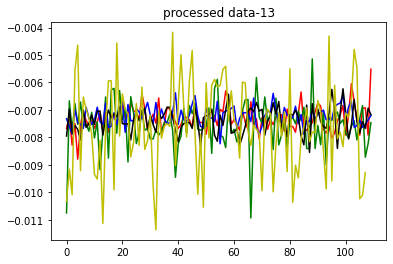

14


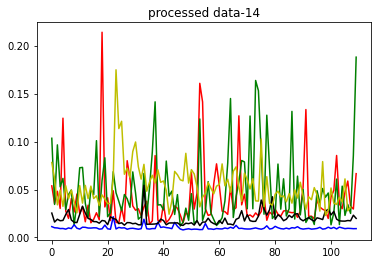

15


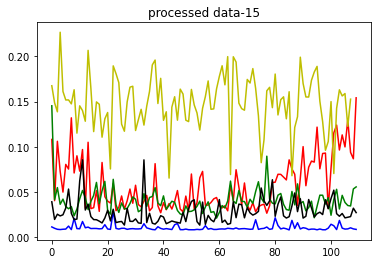

16


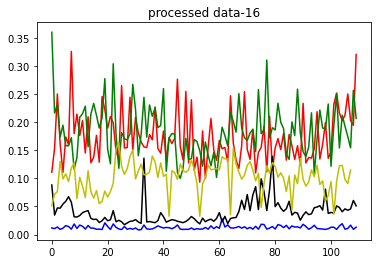

17


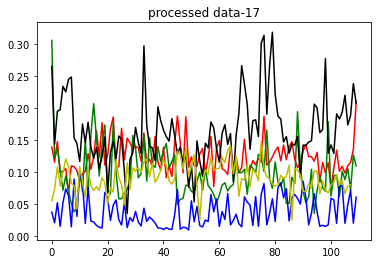

18


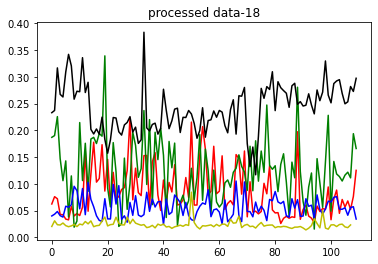

19


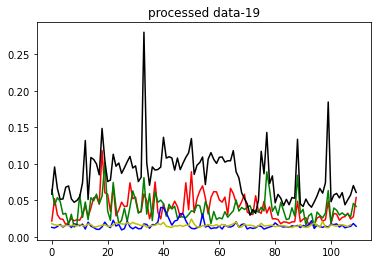

20


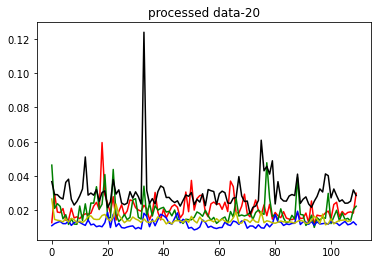

21


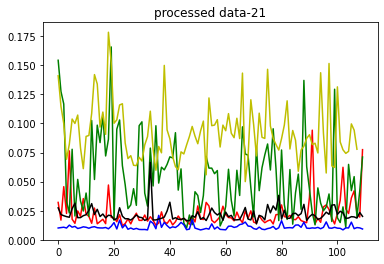

22


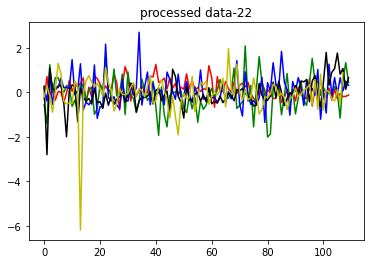

23


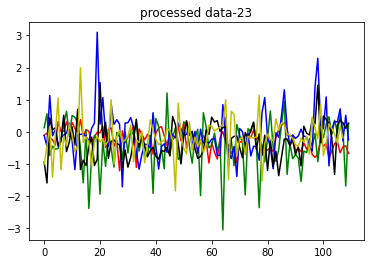

24


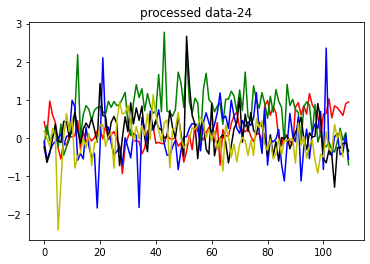

25


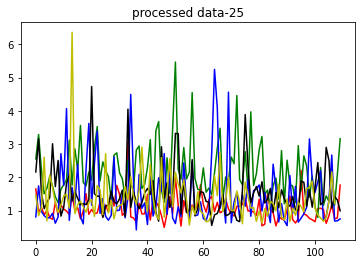

26


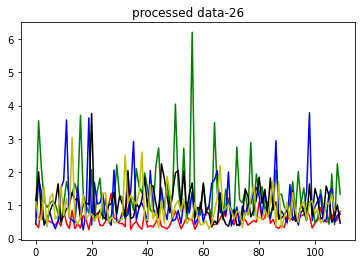

27


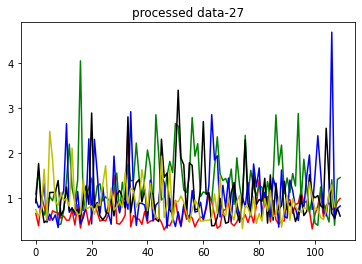

In [3]:
allcolor=["r","g","b","k","y"]
processed_signal=[]
dt=np.zeros(6)
if 1:
    kmax=4
    # dmax=
    for ki in range(5):
        numimax=len(data_all[ki])
        # numimax=5
        for numi in range(numimax):
            fi=0
            dt=[ki]
            for di in range(3):
                pxy=data_all[ki][numi][di]
                
                if di==0:
                    dt=dt+np.mean(pxy,0).tolist()
                    dt=dt+np.mean(np.abs(pxy),0).tolist()

                if di==1:
                    dt=dt+np.mean(pxy,0).tolist()
                    dt=dt+np.mean(np.abs(pxy),0).tolist()

                if di==2:
                    dt=dt+np.mean(pxy,0).tolist()
                    dt=dt+np.mean(np.abs(pxy),0).tolist()

            processed_signal.append(dt)

processed_signal_np=np.asarray(processed_signal)
if 1:
    fi=0
    for fi in range(len(dt)-1):
        f1=plt.figure(fi)
        print(fi)
        for ki in range(5):
            plt.plot(processed_signal_np[processed_signal_np[:,0]==ki,fi+1],color=allcolor[ki])
            plt.title("processed data-"+str(fi))
        plt.show()

# Classification test

In [4]:
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
X = processed_signal_np[:,1:]
y = processed_signal_np[:,0]

random_state_i = None

### Decision Tree Model

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0. -3.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.
  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.]
Accuracy of Decision Tree Model:  0.9757575757575757
0.9757575757575757
Time Taken:  0.011408805847167969


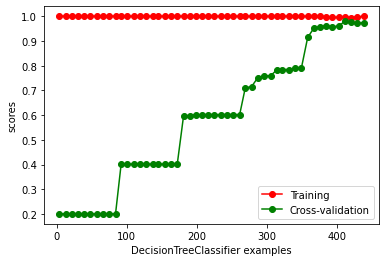

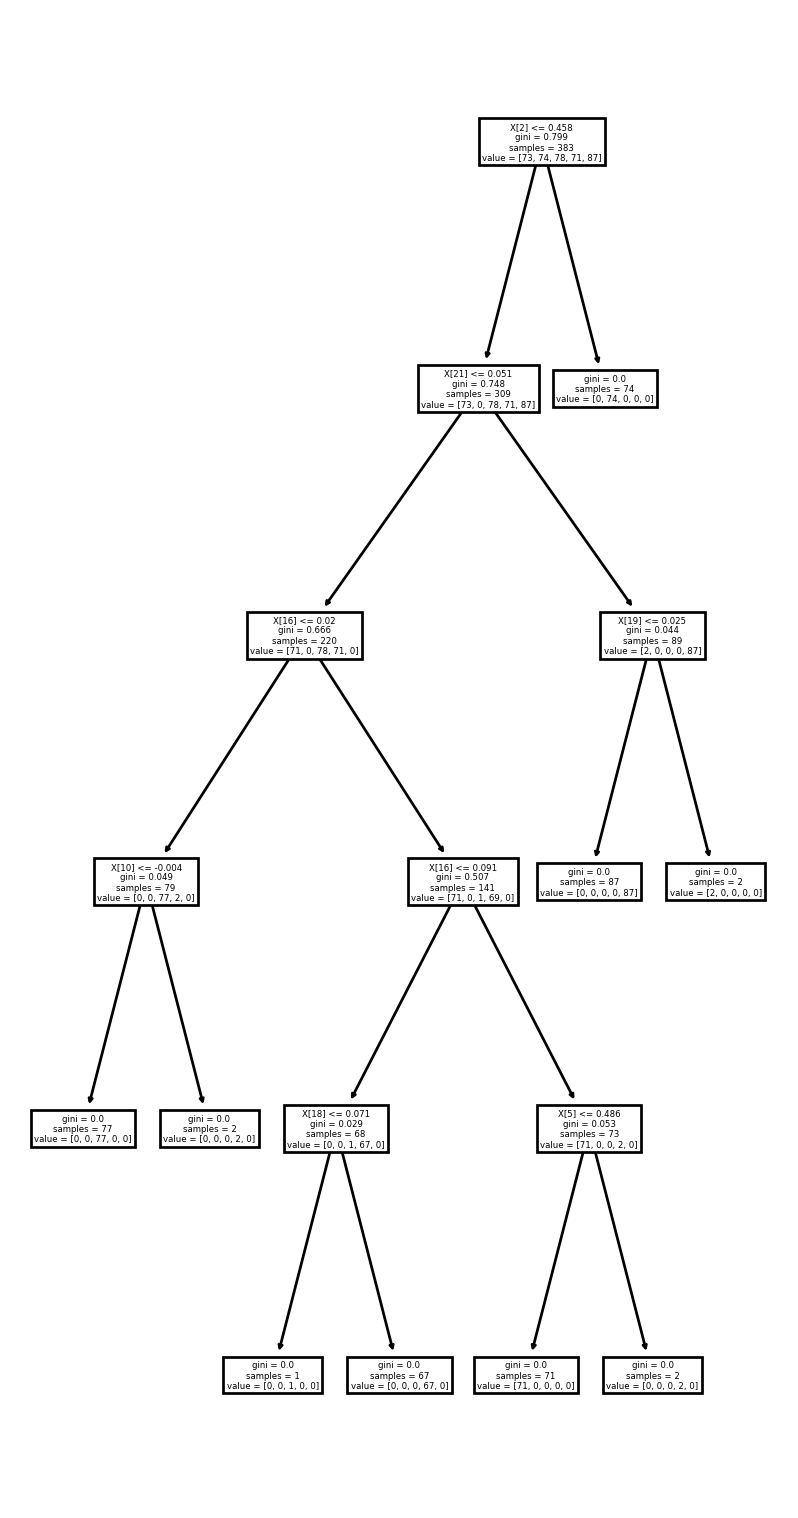

In [5]:


DT_model = 1

if DT_model:
    t1=time.time()
    clf1 = tree.DecisionTreeClassifier(max_depth=5,random_state=2022)
    for model_i in range(1):

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state_i)
        # clf1 = 
        clf1=clf1.fit(X_train, y_train)
        
        y_predict=clf1.predict(X_test)
        clf_score=clf1.score(X_test,y_test)
        print(y_predict-y_test)
        accuracy = float((y_predict == y_test).astype(int).sum()) / float(y_test.size)
        print("Accuracy of Decision Tree Model: ",accuracy)
        print(clf_score)
        print("Time Taken: ",time.time()-t1)
        if 1:
            train_sizes, train_scores, valid_scores = learning_curve(clf1, X, y, train_sizes=np.linspace(0.01, 1.0, 50), cv=5,)
            
            train_scores_mean = np.mean(train_scores, axis=1)
            test_scores_mean = np.mean(valid_scores, axis=1)
            
            # set labels
            plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                     label="Training")
            plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                    label="Cross-validation")
            
            plt.xlabel("DecisionTreeClassifier examples")
            plt.ylabel("scores")
            # show figure
            plt.legend(loc="best")
            plt.show()
            plt.figure(None,[5,10],196)
            tree.plot_tree(clf1)
            plt.show()

### ANN (Multilayer Perceptron)

No handles with labels found to put in legend.


[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0. -4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.]
Accuracy of ANN: 0.9939393939393939
0.9939393939393939
Time Taken of ANN: 2.5614571571350098


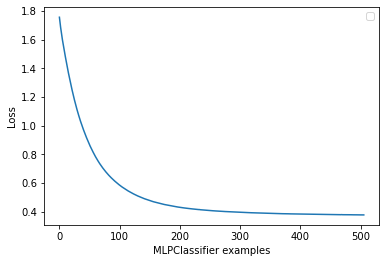

In [6]:
ANN_model = 1

if ANN_model:
    t1=time.time()
    clf2=MLPClassifier(alpha=1, max_iter=2000)
    for model_i in range(1):

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state_i)
        clf2 = clf2.fit(X_train, y_train)
        y_predict=clf2.predict(X_test)
        clf_score=clf2.score(X_test,y_test)
        print(y_predict-y_test)
        accuracy = float((y_predict == y_test).astype(int).sum()) / float(y_test.size)
        print("Accuracy of ANN:",accuracy)
        print(clf_score)
        print("Time Taken of ANN:",time.time()-t1)

        if 1:
            
            plt.plot(clf2.loss_curve_)
            plt.xlabel("MLPClassifier examples")
            plt.ylabel("Loss")
            # show figure
            plt.legend(loc="best")
            plt.show()

### CNN (Convolutional Neural Networks)

Sequential(
  (0): Linear(in_features=28, out_features=100, bias=True)
  (1): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (2): ReLU()
  (3): Linear(in_features=100, out_features=100, bias=True)
  (4): Linear(in_features=100, out_features=5, bias=True)
)
Times of Training:  0 0.18181818181818182
Times of Training:  100 0.48484848484848486
Times of Training:  200 0.5878787878787879
Times of Training:  300 0.6787878787878788
Times of Training:  400 0.7393939393939394
Times of Training:  500 0.7636363636363637
Times of Training:  600 0.7575757575757576
Times of Training:  700 0.7454545454545455
Times of Training:  800 0.7575757575757576
Times of Training:  900 0.7757575757575758
Times of Training:  1000 0.7818181818181819
Times of Training:  1100 0.8121212121212121
Times of Training:  1200 0.8181818181818182
Times of Training:  1300 0.8242424242424242
Times of Training:  1400 0.8242424242424242
Times of Training:  1500 0.8727272727272727
Times of Training: 

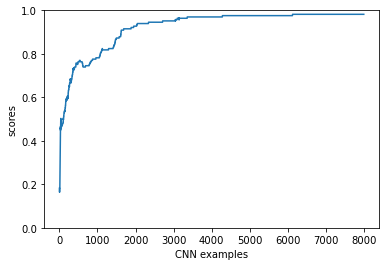

In [7]:
CNN_model = 1

if CNN_model:
    import torch
    import matplotlib.pyplot as plt
    t1=time.time()
    for model_i in range(1):

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state_i)

        cnnx = torch.from_numpy(X_train) .type(torch.FloatTensor)  # shape (200, 2) FloatTensor = 32-bit floating
        cnny = torch.from_numpy(y_train) .type(torch.LongTensor)    # shape (200,) LongTensor = 64-bit integer
        cnn_test_x = torch.from_numpy(X_test) .type(torch.FloatTensor)  # shape (200, 2) FloatTensor = 32-bit floating
        cnn_test_y = torch.from_numpy(y_test) .type(torch.LongTensor)    # shape (200,) LongTensor = 64-bit integer

    net = torch.nn.Sequential(
        torch.nn.Linear(cnnx.shape[1], 100),
        torch.nn.MaxPool1d(1),
        torch.nn.ReLU(),
        torch.nn.Linear(100, 100),
        torch.nn.Linear(100, 5),
        
    )
    
    print(net)  # net architecture
    
    optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
    loss_func = torch.nn.CrossEntropyLoss()  # the target label is NOT an one-hotted
    
    plt.ion()   # something about plotting
    accuracy_all=[]
    for t in range(8000):
        out = net(cnnx)                 # input x and predict based on x
        loss = loss_func(out, cnny)     # must be (1. nn output, 2. target), the target label is NOT one-hotted
    
        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients
        # print(accuracy)
        
        if 1:
            # plot and show learning process
            out_test = net(cnn_test_x)
            prediction = torch.max(out_test, 1)[1]
            pred_y = prediction.data.numpy()
            # target_y = cnny.data.numpy()
            target_y = cnn_test_y.data.numpy()
            accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
            if t % 100 == 0:
                print("Times of Training: ",t,accuracy)
            accuracy_all.append(accuracy)
    if 1:
        plt.plot(accuracy_all)
        plt.ylim([0,1])
        plt.xlabel("CNN examples")
        plt.ylabel("scores")
        out_test = net(cnn_test_x)
        prediction = torch.max(out_test, 1)[1]
        pred_y = prediction.data.numpy()
        # target_y = cnny.data.numpy()
        target_y = cnn_test_y.data.numpy()
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        print("Total Times of Training: ",t,accuracy)
    print("Time Taken of CNN: ",time.time()-t1)
# net2 = torch.load('net.pkl')